In [1]:
# k-means clustering on 149 respondents.
import csv
import numpy
import pandas as pd
import sklearn.cluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Import Preprocessed data
train_url = "dataset.csv"
train = pd.read_csv(train_url)
test_url = "dataset2.csv"
test = pd.read_csv(test_url)
testvariable = "Gender"
# Creating "Noisy" data
def make_private(x, sensitivity, epsilon):
    return x + numpy.random.laplace(0, sensitivity/epsilon)
train=train.apply(lambda x: make_private(x, 1, 0.5))

In [2]:
# Prepare data
X = numpy.array(train.drop([testvariable], 1).astype(float))
testvariable = numpy.array(train[testvariable])

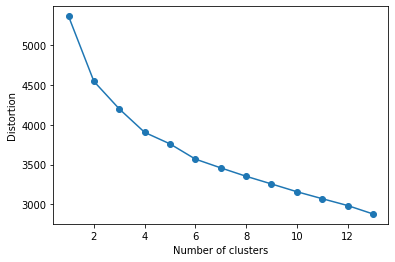

[5362.751388886277, 4544.485994696197, 4198.516835017133, 3903.941653243942, 3759.074939872082, 3568.0703212903254, 3457.8121498420996, 3352.2452658443503, 3255.8925444908155, 3158.348364595699, 3070.712786593106, 2984.882098763209, 2879.2779100505254]


In [3]:
#Plot elbow 
distortions = []
for i in range(1, 14):
    elbowmeans = sklearn.cluster.KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=600,random_state=0,algorithm="full")
    elbowmeans.fit(X)
    distortions.append(elbowmeans.inertia_)
plt.plot(range(1,14), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# Determine number of clusters
countclusters = 3
print(distortions)

In [4]:
# Kmeans with correct # Variables
kmeans =  sklearn.cluster.KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,n_clusters=countclusters, n_init=20, n_jobs=2, precompute_distances='auto', random_state=None, verbose=0)
y_km = kmeans.fit_predict(X)

In [5]:
# Check differences on variable
listvariable= list(testvariable)
correct = 0
avg=sum(testvariable)/len(testvariable)
for j in range(0,len(testvariable)):
    if testvariable[j] >= avg:
        listvariable[j] = 1
    else:
        listvariable[j] = 0
for i in range(len(X)):
    predict_me = numpy.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == listvariable[i]:
        correct += 1
hitchance = correct/len(X) 
if correct/len(X) < 0.5:
    print(str(((1-hitchance)*100))+"% Correct")
else:
    print(str((hitchance*100))+"% Correct")

70.0% Correct


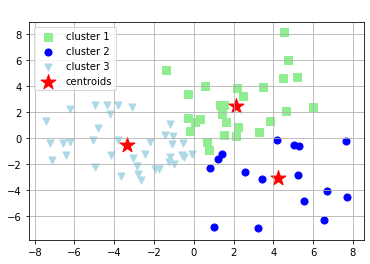

In [7]:
#### PCA for scatterplot
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
y_km = kmeans.fit_predict(X)
components = pca.transform(X)

#Plot in 2d
plt.title('Data points and cluster centroids', c = "w")
plt.scatter(components[y_km==0,0],components[y_km==0,1],s=50, c='lightgreen',marker='s', label='cluster 1')
plt.scatter(components[y_km==1,0],components[y_km==1,1],s=50,c='b',marker='o',label='cluster 2')
plt.scatter(components[y_km==2,0],components[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()